<a href="https://colab.research.google.com/github/rasheedsalmon01/Effecient-frontier_assignment-/blob/main/effecient_frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  7 of 7 completed


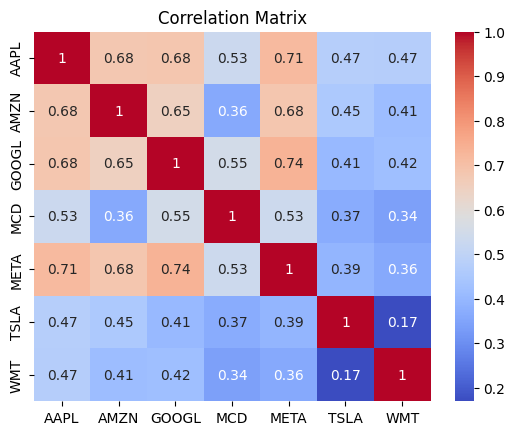

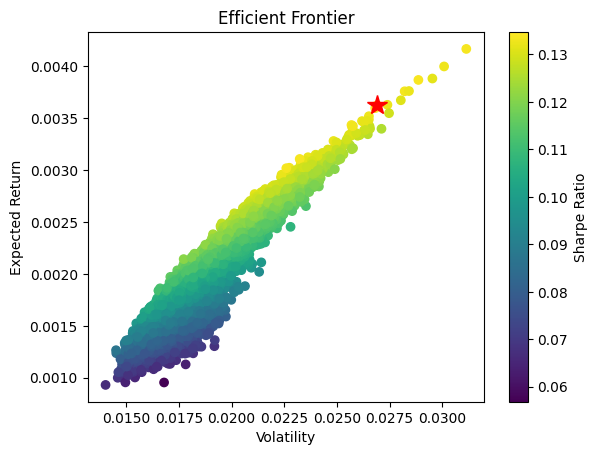

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


# Define the stock tickers
tickers = ['WMT', 'AMZN', 'TSLA', 'META', 'GOOGL', 'MCD', 'AAPL']


class Portfolio:
    
    def __init__(self, tickers, start_date, end_date):
        self.tickers = tickers
        self.start_date = start_date
        self.end_date = end_date
        self.prices = self.get_prices()
        self.returns = self.get_returns()
        self.mean_returns = self.returns.mean()
        self.cov_matrix = self.returns.cov()
        self.corr_matrix = self.returns.corr()
    
    def get_prices(self):
        # Retrieve the data for the past 2 years
        df = yf.download(self.tickers, start=self.start_date, end=self.end_date)
        prices = df['Adj Close']
        return prices
    
    def get_returns(self):
        # Calculate daily returns
        returns = self.prices.pct_change()
        returns = returns.dropna()
        return returns
    
    def calculate_portfolio_performance(self, weights):
        # Calculate portfolio performance
        portfolio_return = np.sum(self.mean_returns * weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(self.cov_matrix, weights)))
        sharpe_ratio = portfolio_return / portfolio_std_dev
        return portfolio_return, portfolio_std_dev, sharpe_ratio
    
    def calculate_efficient_frontier(self, num_portfolios=10000):
        # Calculate the efficient frontier using Monte-Carlo simulation
        np.random.seed(42)
        portfolio_returns = []
        portfolio_std_devs = []
        portfolio_sharpe_ratios = []
        portfolio_weights = []
        for i in range(num_portfolios):
            weights = np.random.random(len(self.tickers))
            weights /= np.sum(weights)
            portfolio_return, portfolio_std_dev, sharpe_ratio = self.calculate_portfolio_performance(weights)
            portfolio_returns.append(portfolio_return)
            portfolio_std_devs.append(portfolio_std_dev)
            portfolio_sharpe_ratios.append(sharpe_ratio)
            portfolio_weights.append(weights)
        return portfolio_returns, portfolio_std_devs, portfolio_sharpe_ratios, portfolio_weights


# Define the portfolio object
portfolio = Portfolio(tickers, start_date="2019-04-23", end_date="2021-04-23")

# Calculate mean, variance, and correlation matrix
mean_returns = portfolio.mean_returns
cov_matrix = portfolio.cov_matrix
corr_matrix = portfolio.corr_matrix


# Calculate the efficient frontier and optimal weights using Monte-Carlo simulation
portfolio_returns, portfolio_std_devs, portfolio_sharpe_ratios, portfolio_weights = portfolio.calculate_efficient_frontier()
max_sharpe_idx = np.argmax(portfolio_sharpe_ratios)
optimal_weights = portfolio_weights[max_sharpe_idx]

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

# Plot the efficient frontier
plt.scatter(portfolio_std_devs, portfolio_returns, c=portfolio_sharpe_ratios, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.plot(portfolio_std_devs[max_sharpe_idx], portfolio_returns[max_sharpe_idx], 'r*', markersize=15.0)
plt.savefig('efficient_frontier.png')
